# Setting Environment

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV

In [6]:
df_tweets = pd.read_csv('./cbow_tweets.csv')
df_tweets.head()

,sentimen,tweet
0,2,"[-0.23693527, 0.4661431, 0.18114139, 0.0412429..."
1,0,"[-0.22296488, 0.39398727, -0.08384471, -0.0073..."
2,0,"[-0.20492682, 0.38979286, 0.13093518, 0.001421..."
3,1,"[-0.22495545, 0.3846609, 0.06029179, -0.004197..."
4,1,"[-0.19274125, 0.33150145, 0.108148955, 0.00647..."


# Fiture Selection

In [7]:
X = df_tweets.tweet
y = df_tweets.sentimen

# Data Modeling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10) 

In [9]:
X_train, X_test

(2331    [-0.1880696, 0.32973382, 0.08497452, 0.0054769...
 2558    [-0.11976984, 0.1957274, 0.024797132, 0.003356...
 1234    [-0.04524022, 0.30104125, 0.09387542, -0.10146...
 1804    [-0.07742319, 0.14883535, 0.042852886, 0.00604...
 2165    [-0.04836996, 0.29832825, -0.069404125, -0.122...
                               ...                        
 3441    [-0.13277557, 0.30124015, 0.13550697, -0.05599...
 1344    [-0.23291521, 0.36474136, 0.10707055, -0.03570...
 527     [-0.14244759, 0.24897668, 0.05724673, 0.009201...
 3197    [-0.04836996, 0.29832825, -0.069404125, -0.122...
 1289    [-0.3476616, 0.6700046, 0.013283921, 0.1623264...
 Name: tweet, Length: 2901, dtype: object,
 101     [-0.09755726, 0.15881033, 0.03442928, -0.00033...
 1080    [-0.15706395, 0.28843608, 0.17047228, -0.01618...
 1731    [-0.06972661, 0.12713273, 0.04502087, -0.00809...
 3011    [-0.23693527, 0.4661431, 0.18114139, 0.0412429...
 2362    [-0.15713602, 0.27141103, 0.075677134, -0.0081...
             

In [10]:
max_len = 3000
# Ubah string menjadi daftar
X = X.apply(ast.literal_eval)
X_train = X_train.apply(ast.literal_eval)
X_test = X_test.apply(ast.literal_eval)
# Gunakan pad_sequences
X = pad_sequences(X, maxlen=max_len)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [11]:
X_train, X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2901, 3000)
(726, 3000)
(2901,)
(726,)


In [13]:

scores = ['precision', 'recall']

def run_tuning(model, hyperparameters, scores, X_train, y_train, X_test, y_test):
    for score in scores:
        print("Tuning hyperparameter for %s" % score)
        print()

        clf = GridSearchCV(model, hyperparameters, scoring='%s_macro' % score, cv=None, n_jobs=-1)
        clf.fit(X_train, y_train)

        print('Best parameter set found: ')
        print()
        print(clf.best_params_)
        print()

        print('Grid scores in process: ')
        print()
        means = clf.cv_results_['mean_test_score']

        for mean, params in zip(means, clf.cv_results_['params']):
            print('%0.3f for %r' % (mean, params))

        print()
        print()
        print('Detail Classification Report')
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()
     

In [14]:

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [10, 100],
    'max_features': [2, 3, 'auto'],
    'n_estimators': [10, 100, 200]}

In [15]:
rfc = RandomForestClassifier(n_jobs=-1)
run_tuning(rfc, hyperparameters, scores, X_train, y_train, X_test, y_test)

Tuning hyperparameter for precision



Best parameter set found: 

{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_estimators': 200}

Grid scores in process: 

0.405 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 10}
0.477 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 100}
0.469 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'n_estimators': 200}
0.445 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 10}
0.473 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 100}
0.483 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 200}
0.446 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
0.456 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
0.462 for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
0.499 for {'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'n_es

In [22]:
rf_clf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, n_estimators=200)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=2, n_estimators=200)

In [23]:
y_pred = rf_clf.predict(X_test)

In [24]:
len(y_pred), len(y_test), y_train

(726,
 726,
 2331    1
 2558    2
 1234    1
 1804    2
 2165    0
        ..
 3441    1
 1344    2
 527     1
 3197    0
 1289    1
 Name: sentimen, Length: 2901, dtype: int64)

# Evaluate

## Confusion matrix

In [25]:
# buat confusion matrix antara Test dan Prediksi
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,143,41,48
1,60,134,47
2,70,55,128


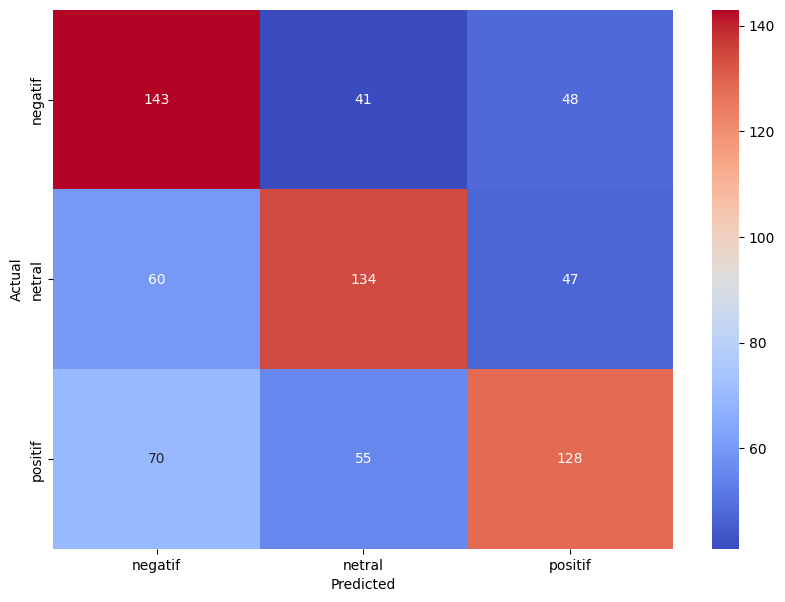

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Accuracy, Recall, Precision, F1 Score

In [27]:
report = classification_report(y_test, y_pred)
print(report)

# Hitung dan cetak accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.52      0.62      0.57       232
           1       0.58      0.56      0.57       241
           2       0.57      0.51      0.54       253

    accuracy                           0.56       726
   macro avg       0.56      0.56      0.56       726
weighted avg       0.56      0.56      0.56       726

Accuracy: 0.5578512396694215
